In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

colorDict={'r':(1,0,0), 'g':(0,1,0), 'b':(0,0,1), 'w':(1,1,1), 'o':(1,0.5,0), 'y':(1,1,0),'tie':(160./255,32./255,40./255)}

In [2]:
tileColors = ['r', 'g', 'b', 'w', 'o', 'y', 'r', 'g', 'b', 'w', 'o', 'y']

In [3]:
class Triangle:
    
    # "col" in this class refers to column relative to the leftmost triangles in the puzzle,
    # so may not be 0 even if the triangle is leftmost in its row.
    def __init__(self, row, col, up, tileId=None):
        self.row = row
        self.col = col
        self.up = up
        if tileId == None:
            self.tileId = None
            self.color = None
            return
        try:
            self.tileId = int(tileId)
        except:
            self.tileId = ord('a') - ord(tileId) + 10
        self.color = colorDict[tileColors[self.tileId]]
        
    def getCoords(self):
        leftX = self.col
        leftY = 16 - 2*self.row
        if self.up:
            leftY -= 2
            return [[leftX, leftY], [leftX+2, leftY], [leftX+1, leftY+2]]
        return [[leftX, leftY], [leftX+2, leftY], [leftX+1, leftY-2]]

In [9]:
class Board:
    
    ROW_WIDTHS = [3, 5, 7, 9, 11, 13, 13, 11]
    COL_STARTS = [7 - rw//2 - 1 for rw in ROW_WIDTHS]
    COL_ENDS = [7 + rw//2 - 1 for rw in ROW_WIDTHS] # inclusive
    
    def __init__(self):
        self.ax = self.blank_board()
        self.triangles = []
        
        row = 0
        for row in range(len(Board.ROW_WIDTHS)):
            rowTriangles = [None]*Board.COL_STARTS[row]
            startCol = Board.COL_STARTS[row]
            for col in range(startCol, startCol+Board.ROW_WIDTHS[row]):
                rowTriangles.append(Triangle(row, col, (row+col)%2!=0))
            row += 1
            self.triangles.append(rowTriangles)
    
    # "col" here refers to column relative to leftmost triangle in row.
    # Actually fuck this, i'm over it. columns are just distance from y axis
    # No i will keep this public function that is like that, which is just a shell around
    # the private function that does it in the distance-from-y way.
    def addTriangle(self, row, col, color=(222./255,184./255,135./255)):
        self._addTriangle(row, col + Board.COL_STARTS[row], color)
    
    # So this is the private function and col is just distance from y axis.
    def _addTriangle(self, row, col, color):
        
        # Get corner points of the triangle
        t = self.triangles[row][col]
        pts = t.getCoords()
        self.ax.add_patch(Polygon(pts,closed=True,color=color))

        # Draw edges if triangle borders on existing triangles that don't belong to same piece
        if col > Board.COL_STARTS[row]:
            leftNeighbor = self.triangles[row][col-1]
            if leftNeighbor.tileId != None and leftNeighbor.tileId != t.tileId:
                self.ax.plot(pts[0], pts[2], 'k-', lw=2)
        if col < Board.COL_ENDS[row]:
            rightNeighbor = self.triangles[row][col+1]
            if rightNeighbor.tileId != None and rightNeighbor.tileId != t.tileId:
                self.ax.plot(pts[1], pts[2], 'k-', lw=2)
                
        verticalNeighbor = self.getVerticalNeighbor(t, row, col)
        if (verticalNeighbor != None and 
            verticalNeighbor.tileId != None and 
            verticalNeighbor.tileId != t.tileId):
            self.ax.plot(pts[0], pts[1], 'k-', lw=2)
    
    def getVerticalNeighbor(self, t, row, col):
        if (t.up and row == 7) or ((not t.up) and row == 0):
            return None;
        if t.up:
            return self.triangles[row+1][col]
        return self.triangles[row-1][col]
    
    def blank_board(self):
        '''
        makes a super dank blank board and returns an axes object
        wanna add tile or something? pass the sweet object returned from this function to addTile along with coords!
        fuckin matplotlib objects mate. yeah!!!
        '''
        plt.figure(figsize=(10,10))

        pts = [[0,4], [2,0], [-1,-1]]
        bl = Polygon(pts, closed=True,color='white')

        pts = [[12,0], [16,-1], [14,4]]
        br = Polygon(pts,closed=True,color='white')

        pts = [[-1,17], [6,16], [0,4]]
        tl = Polygon(pts,closed=True,color='white')

        pts = [[15,17], [8,16], [14,4]]
        tr = Polygon(pts,closed=True,color='white')


        ax = plt.gca()
        ax.add_patch(tl)
        ax.add_patch(tr)
        ax.add_patch(bl)
        ax.add_patch(br)

        for i in range(9):
            ax.plot([0,14],[2*i,2*i],'k-',lw=2,zorder=0)

        [[6,16],[0,4]],[[8,16],[1,2]],[[9,14],[2,0]],[[10,12],[4,0]]
        for i in range(6):
            ax.plot([2*i,8+i],[0,16-(2*i)],'k-',lw=2,zorder=0)
            ax.plot([14-(2*i),6-i],[0,16-(2*i)],'k-',lw=2,zorder=0)

        ax.plot([2,0],[0,4],'k-',lw=2)
        ax.plot([0,6],[4,16],'k-',lw=2)

        ax.plot([12,14],[0,4],'k-',lw=2)
        ax.plot([14,8],[4,16],'k-',lw=2)

        ax.set_xlim([-1,15])
        ax.set_ylim([-1,17])
#         ax.axis('off')
        return ax

In [29]:
# TODO this thing is still set up for upside down version of the triangle

def addTile(ax,row=0,col=0,color=(222./255,184./255,135./255), edges=set()):
    '''
    Default color is 'burlywood' an excellent name for a color
    Doesn't check if passed a valid position so don't fuck up
    but if you do just call blankboard again :D
    '''
    print("oh wild i guess this is getting used?")
    y=16-row*2
    if row>5:
        x=(2-row)+col
        if col%2==0:
            #Pointing Up
            pts=[[x,y],[x-1,y-2],[x+1,y-2]]
        else:
            pts=[[x-1,y],[x+1,y],[x,y-2]]
    else:

        x=(-1+row)+col
        if col%2==0:
            #Pointing Down
            pts=[[x-1,y],[x+1,y],[x,y-2]]
        else:
            pts=[[x,y],[x-1,y-2],[x+1,y-2]]
    ax.add_patch(Polygon(pts,closed=True,color=color))
    if 0 in edges:
        ax.plot(pts[0], pts[1],'k-',lw=2)
    if 1 in edges:
        ax.plot(pts[1], pts[2],'k-',lw=2)
    if 2 in edges:
        ax.plot(pts[2], pts[0],'k-',lw=2)

IndexError: list index out of range

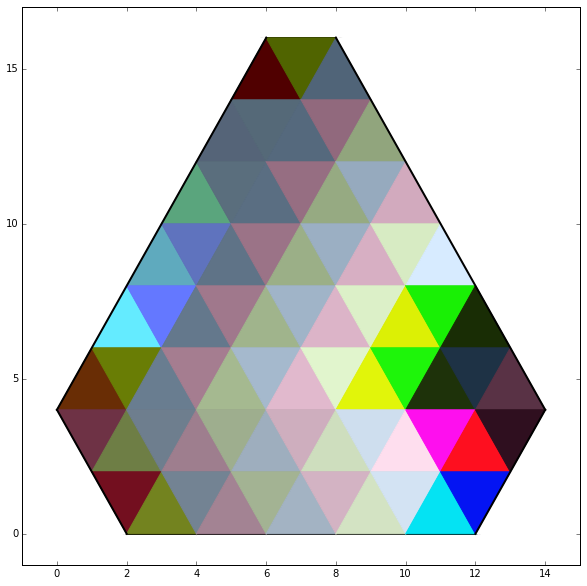

In [32]:
b = Board()
c = [0,0,0]
for row in range(6):
    for col in range(2*row + 3):
        c[col%3]+=row*5+col*20+80
        c[col%3]%=256
        c[col%3]/=256.
        b.addTriangle(row, col, c)
for row in range(6,8):
    for col in range(25-2*row):
        c[col%3]+=row*5+col*16+80
        c[col%3]%=256
        c[col%3]/=256.
        b.addTriangle(row, col, c)
b.addTriangle(0,10,c)